In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import re
import string
import nltk

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
df = pd.read_csv("/content/Symptom2Disease.csv")

In [6]:
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   label       1200 non-null   object
 2   text        1200 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.2+ KB


In [8]:
df["label"].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [9]:
px.bar(df["label"].value_counts().index,df["label"].value_counts().values)

In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True)
x = df["text"]
y = df["label"]

In [11]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [12]:
def lower_case(x):
    for i in range(len(x)):
        x[i] = str(x[i]).lower()
def number_remove(x):
    for i in range(len(x)):
        x[i] = re.sub(r"\d+",'',x[i])

In [13]:
def punctuation(x):
    punct = str.maketrans('','',string.punctuation)
    for i in range(len(x)):
        x[i] = x[i].replace(","," ")
        x[i] = x[i].translate(punct)
def white_space(x):
    for i in range(len(x)):
        x[i] = " ".join(x[i].split())

In [14]:
def token(x):
    for i in range(len(x)):
        x[i] = word_tokenize(x[i])

In [15]:
def stopword(x):
    stop_words = set(stopwords.words('english'))
    for i in range(len(x)):
        list1 = []
        for j in range(len(x[i])):
            if x[i][j] not in stop_words:
                list1.append(x[i][j])
        x[i] = list1

In [16]:
df.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [17]:
wd =  WordNetLemmatizer()

In [18]:
def pos_create(x):
    for i in range(len(x)):
        list1 = []
        for j in range(len(x[i])):
            list2 = []
            list2.append(x[i][j])
            list1.append(nltk.pos_tag(list2))
        x[i] = list1

In [19]:
def pos_place(x):
    for i in range(len(x)):
        for j in range(len(x[i])):
            if x[i][j][1].startswith('J'):
                x[i][j][1] = wordnet.ADJ
            elif x[i][j][1].startswith('V'):
                x[i][j][1] = wordnet.VERB
            elif x[i][j][1].startswith('N'):
                x[i][j][1] = wordnet.NOUN
            elif x[i][j][1].startswith('R'):
                x[i][j][1] = wordnet.ADV
            else:
                x[i][j][1] =  None

In [20]:
def convert(x):
    for i in range(len(x)):
        list1 = []
        for j in range(len(x[i])):
            l = str(x[i][j]).split()
            punctuation(l)
            list1.append(list(l))
        x[i] = list1

In [21]:
def lem(x):
    for i in range(len(x)):
        list1 = []
        for j in range(len(x[i])):
            if (x[i][j][1] == None):
                list1.append(x[i][j][0])
            else:
                list1.append(wd.lemmatize(x[i][j][0],x[i][j][1]))
        x[i] = " ".join(list1)

In [24]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
lower_case(x)
number_remove(x)
punctuation(x)
white_space(x)
token(x)
stopword(x)
pos_create(x)
convert(x)
pos_place(x)
lem(x)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [25]:
df.head()

,label,text
0,Psoriasis,experiencing skin rash arms legs torso p...
1,Psoriasis,skin peeling especially knees elbows scal...
2,Psoriasis,experiencing joint pain fingers wrists kn...
3,Psoriasis,silver like dusting skin especially lower...
4,Psoriasis,nails small dents pits often feel inflam...


LOGISTIC REGRESSION


In [26]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state =0)
lr = LogisticRegression(C=24,max_iter=150)
lr.fit(X_train,Y_train)

LogisticRegression(C=24, max_iter=150)

In [27]:
lr.score(X_test,Y_test)*100

97.66666666666667

Text(0.5, 23.52222222222222, 'Actual')

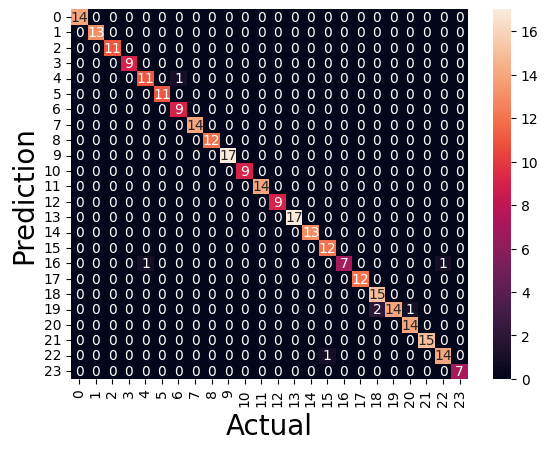

In [28]:
test =lr.predict(X_test)
cm = confusion_matrix(test,Y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel("Prediction",fontsize=20)
plt.xlabel("Actual",fontsize=20)

Naive Bayes

In [29]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

In [30]:
mnb.score(X_test,Y_test)*100

94.33333333333334

Text(0.5, 23.52222222222222, 'Actual')

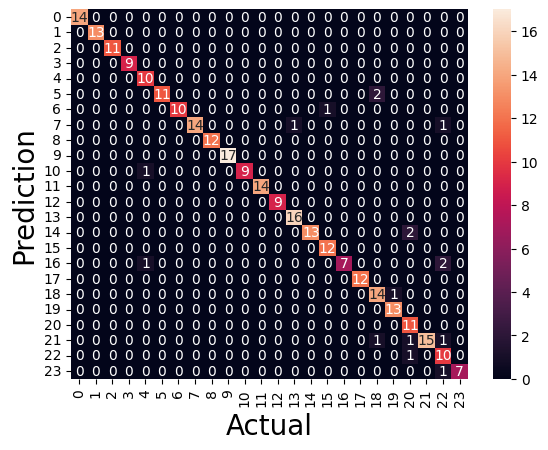

In [31]:
test =mnb.predict(X_test)
cm = confusion_matrix(test,Y_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel("Prediction",fontsize=20)
plt.xlabel("Actual",fontsize=20)

In [32]:
y.unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [34]:
t = ["I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."]

In [35]:
lower_case(t)
number_remove(t)
punctuation(t)
white_space(t)
token(t)
stopword(t)
pos_create(t)
convert(t)
pos_place(t)
lem(t)

In [36]:
l = cv.transform(t)

In [37]:
lr.predict(l)

array(['Psoriasis'], dtype=object)